# Introduction to Focus Areas
### Project 2

### Group 13: Ammara Akthar, Friederike Wohlfarth

In [1]:
import cv2
import numpy as np
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import glob
import random
from google.colab import drive
import tarfile
#os.chdir("/content/")
import os
import os.path
import matplotlib.pyplot as plt
import random
from shutil import copyfile
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from sklearn import metrics


In [3]:
drive.mount('drive')

Mounted at drive


In [ ]:
#!wget http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz


--2023-11-15 21:41:55--  http://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz
Resolving www.inf.ufpr.br (www.inf.ufpr.br)... 200.17.202.113, 2801:82:80ff:8001:216:ccff:feaa:79
Connecting to www.inf.ufpr.br (www.inf.ufpr.br)|200.17.202.113|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz [following]
--2023-11-15 21:41:56--  https://www.inf.ufpr.br/vri/databases/BreaKHis_v1.tar.gz
Connecting to www.inf.ufpr.br (www.inf.ufpr.br)|200.17.202.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4273561758 (4.0G) [application/octet-stream]
Saving to: ‘BreaKHis_v1.tar.gz’

BreaKHis_v1.tar.gz  100%[===================>]   3.98G  23.7MB/s    in 2m 56s  

2023-11-15 21:44:53 (23.1 MB/s) - ‘BreaKHis_v1.tar.gz’ saved [4273561758/4273561758]



In [ ]:
#copy the file BreakHis_v1.tar.gz into the mkfold directory
#decompress the BreakHis_v1.tar.gz file
#run the script <python mkfold.py>

# Data Preprocessing

## Reading data and split it into folder to make it binary classification problem

In [4]:
print(os.getcwd())
os.chdir("/content/drive/My Drive/Colab Notebooks")

# Specify the source directory where the 400X images are located
source_directory = "/content/drive/My Drive/Colab Notebooks/fold1"

# Specify the target directory where you want to collect the 400X images
#target_directory = "data/dataset"
target_directory = "/content/sample_data"

# Ensure the target directory exists
os.makedirs(target_directory, exist_ok=True)

# Function to copy 400X images from subfolders to the target directory
def copy_400X_images(source_dir, target_dir):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if "400x" in root.lower():
                image_path = os.path.join(root, file)
                target_class = "benign" if "_B_" in file else "malignant"
                class_dir = os.path.join(target_dir, target_class)
                os.makedirs(class_dir, exist_ok=True)
                shutil.copy(image_path, os.path.join(class_dir, file))

# Copy 400X images to the target directories based on class
copy_400X_images(source_directory, target_directory)

print("Copying 400X images completed.")


/content
Copying 400X images completed.


In [5]:
#do the same for 40x magnification

def copy_40X_images(source_dir, target_dir):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if "40x" in root.lower():
                image_path = os.path.join(root, file)
                target_class = "benign40x" if "_B_" in file else "malignant40x"
                class_dir = os.path.join(target_dir, target_class)
                os.makedirs(class_dir, exist_ok=True)
                shutil.copy(image_path, os.path.join(class_dir, file))

copy_40X_images(source_directory, target_directory)

print("Copying 40X images completed.")


Copying 40X images completed.


In [ ]:
# we do not need this
dataset_path = "/content/sample_data"

classes = ["benign", "malignant"]
images = []
labels = []

for class_name in classes:
    class_dir = os.path.join(dataset_path, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        images.append(image_path)
        labels.append(classes.index(class_name))

In [ ]:
len(images)

1820

In [ ]:
len(labels)

1820

## Split data into train and test dataset

In [6]:
# Define the paths to your dataset folders
data_dir = '/content/sample_data/'
benign_dir = os.path.join(data_dir, 'benign')
malignant_dir = os.path.join(data_dir, 'malignant')

# Define the directories for the training and testing sets
train_dir = '/content/sample_data/train'
test_dir = '/content/sample_data/test'

# Create the training and testing directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the ratio of images to use for testing (e.g., 20% for testing, 80% for training)
test_ratio = 0.2

# Create subdirectories in the train and test directories
os.makedirs(os.path.join(train_dir, 'benign'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'malignant'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'benign'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'malignant'), exist_ok=True)

# List all image files in the benign and malignant directories
benign_images = os.listdir(benign_dir)
malignant_images = os.listdir(malignant_dir)

# Shuffle the image lists
random.shuffle(benign_images)
random.shuffle(malignant_images)

# Calculate the number of images to use for testing
num_benign_test = int(test_ratio * len(benign_images))
num_malignant_test = int(test_ratio * len(malignant_images))

# Copy images to the test directory
for image in benign_images[:num_benign_test]:
    src = os.path.join(benign_dir, image)
    dst = os.path.join(test_dir, 'benign', image)
    copyfile(src, dst)

for image in malignant_images[:num_malignant_test]:
    src = os.path.join(malignant_dir, image)
    dst = os.path.join(test_dir, 'malignant', image)
    copyfile(src, dst)

# Copy the remaining images to the training directory
for image in benign_images[num_benign_test:]:
    src = os.path.join(benign_dir, image)
    dst = os.path.join(train_dir, 'benign', image)
    copyfile(src, dst)

for image in malignant_images[num_malignant_test:]:
    src = os.path.join(malignant_dir, image)
    dst = os.path.join(train_dir, 'malignant', image)
    copyfile(src, dst)

print("Dataset split into training and testing sets.")


Dataset split into training and testing sets.


In [7]:
#do the same for 40x magnification
# Define the paths to your dataset folders
data_dir = '/content/sample_data/'
benign_dir = os.path.join(data_dir, 'benign40x')
malignant_dir = os.path.join(data_dir, 'malignant40x')

# Define the directories for the training and testing sets
train_dir = '/content/sample_data/train40x'
test_dir = '/content/sample_data/test40x'

# Create the training and testing directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Define the ratio of images to use for testing (e.g., 20% for testing, 80% for training)
test_ratio = 0.2

# Create subdirectories in the train and test directories
os.makedirs(os.path.join(train_dir, 'benign'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'malignant'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'benign'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'malignant'), exist_ok=True)

# List all image files in the benign and malignant directories
benign_images = os.listdir(benign_dir)
malignant_images = os.listdir(malignant_dir)

# Shuffle the image lists
random.shuffle(benign_images)
random.shuffle(malignant_images)

# Calculate the number of images to use for testing
num_benign_test = int(test_ratio * len(benign_images))
num_malignant_test = int(test_ratio * len(malignant_images))

# Copy images to the test directory
for image in benign_images[:num_benign_test]:
    src = os.path.join(benign_dir, image)
    dst = os.path.join(test_dir, 'benign', image)
    copyfile(src, dst)

for image in malignant_images[:num_malignant_test]:
    src = os.path.join(malignant_dir, image)
    dst = os.path.join(test_dir, 'malignant', image)
    copyfile(src, dst)

# Copy the remaining images to the training directory
for image in benign_images[num_benign_test:]:
    src = os.path.join(benign_dir, image)
    dst = os.path.join(train_dir, 'benign', image)
    copyfile(src, dst)

for image in malignant_images[num_malignant_test:]:
    src = os.path.join(malignant_dir, image)
    dst = os.path.join(train_dir, 'malignant', image)
    copyfile(src, dst)

print("Dataset split into training and testing sets.")

Dataset split into training and testing sets.


In [ ]:
#do not use

for index, img_path in enumerate(tqdm(os.listdir('/content/sample_data/train'), desc ="Loading training images")):

  img = Image.open('/content/sample_data/train' + img_path)
  #img = img.resize((100, 100))
  img = np.array(img)
  img = img / 255.0
  train_images.append(img)
  train_labels.append(0 if '_M_' in img_path else 1)

In [8]:
train_dir = '/content/sample_data/train'
test_dir = '/content/sample_data/test'

train_dir40x = '/content/sample_data/train40x'
test_dir40x = '/content/sample_data/test40x'

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values to the range [0, 1]
    rotation_range=20,   # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift the width of images
    height_shift_range=0.2,  # Randomly shift the height of images
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,   # Randomly zoom in on images
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in newly created pixels with values from nearby pixels
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

In [10]:
batch_size = 32  # Adjust as needed
img_size = (150, 150)  # Adjust based on your model's input size

train_generator = train_datagen.flow_from_directory(
    train_dir,
    shuffle=True,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    shuffle=False,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)


train_generator40x = train_datagen.flow_from_directory(
    train_dir40x,
    shuffle=True,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

test_generator40x = test_datagen.flow_from_directory(
    test_dir40x,
    shuffle=False,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)



Found 1457 images belonging to 2 classes.
Found 363 images belonging to 2 classes.
Found 1596 images belonging to 2 classes.
Found 399 images belonging to 2 classes.


Batch shape:  (32, 150, 150, 3)
Label shape:  (32,)
Batch shape:  [1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 1. 1. 0.]
{'benign': 0, 'malignant': 1}


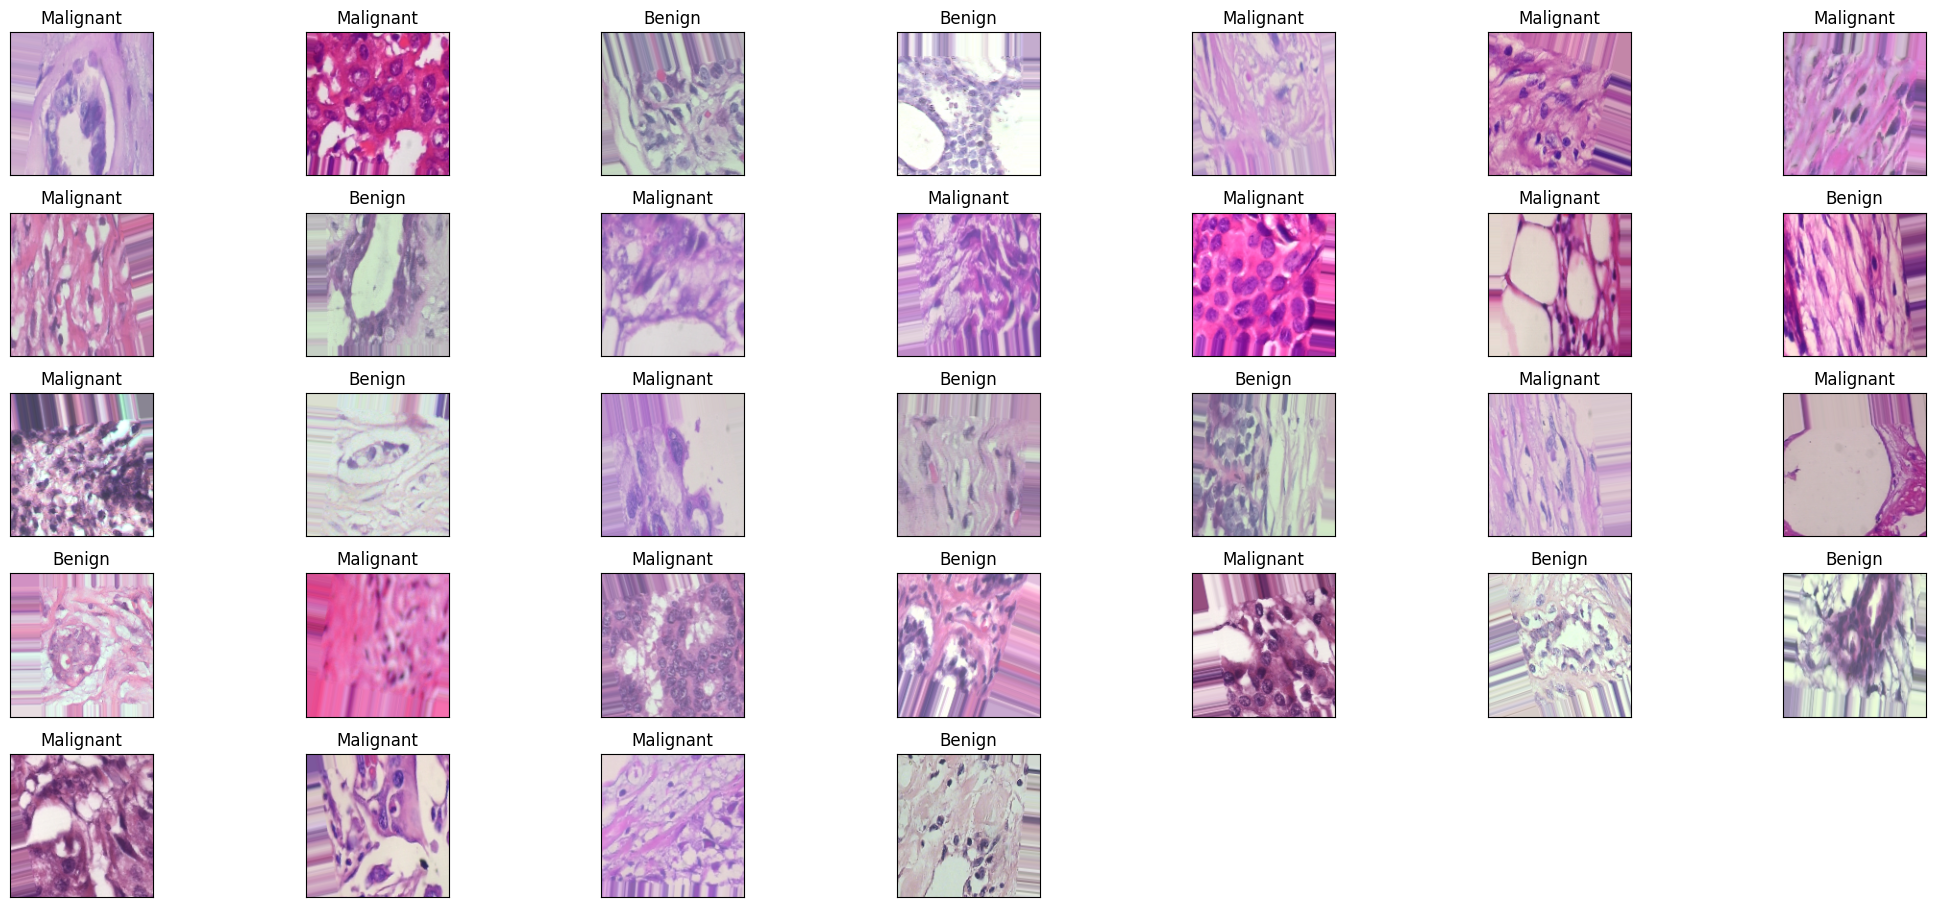

In [11]:
#test train generator and print one batch

images, labels = next(iter(train_generator))

print('Batch shape: ', images.shape)
print('Label shape: ', labels.shape)

print('Batch shape: ',labels)
#print('Batch shape: ',images)

fig = plt.figure(figsize=(20, 20))
for i in range(32):
    ax = fig.add_subplot(11, 7, i+1 , xticks=[], yticks=[])
    plt.imshow(images[i])
    fig.tight_layout()
    plt.subplots_adjust(wspace=0.5)
    label = "Benign" if labels[i]==0 else "Malignant"
    ax.set_title((label))
print(train_generator.class_indices)


# CNN-Model

In [64]:
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model_cnn.add(MaxPool2D((2, 2)))
model_cnn.add(Conv2D(64, (3, 3), activation='relu'))
model_cnn.add(MaxPool2D((2, 2)))
model_cnn.add(Conv2D(128, (3, 3), activation='relu'))
model_cnn.add(Flatten())
model_cnn.add(Dense(1, activation='sigmoid'))

train_datagen.flow_from_directory
model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.SensitivityAtSpecificity(0.5),keras.metrics.Precision(), keras.metrics.Recall()])  # Adjust loss and metrics accordingly


In [65]:
epochs = 10
history_cnn = model_cnn.fit(train_generator, epochs=epochs, validation_data=(test_generator))
loss,accuracy, specificity, sensitivity,precision, recall = model_cnn.evaluate(test_generator)
print("Test accuracy:", accuracy)


Epoch 1/10
46/46 [==============================] - 131s 3s/step - loss: 0.6263 - accuracy: 0.6795 - specificity_at_sensitivity_3: 0.7240 - sensitivity_at_specificity_3: 0.7252 - precision_3: 0.7122 - recall_3: 0.8834 - val_loss: 0.4837 - val_accuracy: 0.7851 - val_specificity_at_sensitivity_3: 0.8718 - val_sensitivity_at_specificity_3: 0.9593 - val_precision_3: 0.7727 - val_recall_3: 0.9675
Epoch 2/10
46/46 [==============================] - 94s 2s/step - loss: 0.4995 - accuracy: 0.7804 - specificity_at_sensitivity_3: 0.8450 - sensitivity_at_specificity_3: 0.9138 - precision_3: 0.7968 - recall_3: 0.9067 - val_loss: 0.4469 - val_accuracy: 0.8347 - val_specificity_at_sensitivity_3: 0.8632 - val_sensitivity_at_specificity_3: 0.9553 - val_precision_3: 0.8321 - val_recall_3: 0.9472
Epoch 3/10
46/46 [==============================] - 95s 2s/step - loss: 0.4545 - accuracy: 0.8161 - specificity_at_sensitivity_3: 0.8620 - sensitivity_at_specificity_3: 0.9544 - precision_3: 0.8306 - recall_3: 0

dict_keys(['loss', 'accuracy', 'specificity_at_sensitivity_3', 'sensitivity_at_specificity_3', 'precision_3', 'recall_3', 'val_loss', 'val_accuracy', 'val_specificity_at_sensitivity_3', 'val_sensitivity_at_specificity_3', 'val_precision_3', 'val_recall_3'])


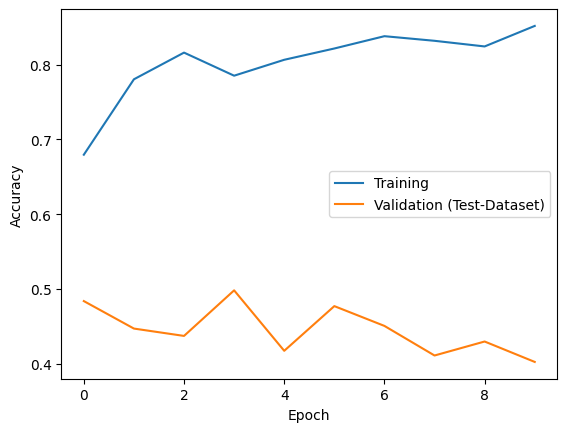

In [66]:
plt.plot(history_cnn.history['accuracy'])
print(history_cnn.history.keys())
plt.plot(history_cnn.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation (Test-Dataset)'])
plt.show()

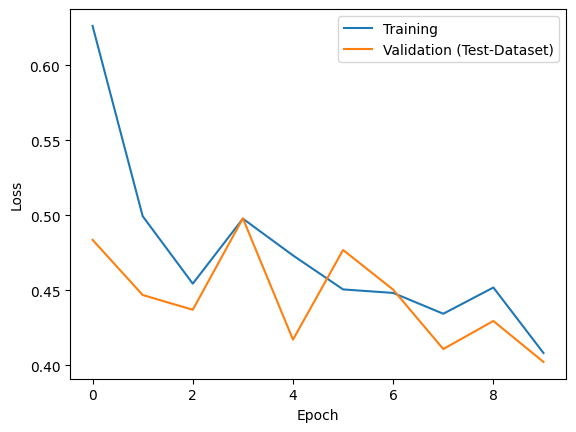

In [67]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation (Test-Dataset)'])
plt.show()

In [68]:
y_pred_proba_cnn = model_cnn.predict(test_generator)

12/12 [==============================] - 9s 641ms/step


# Roc-Curve

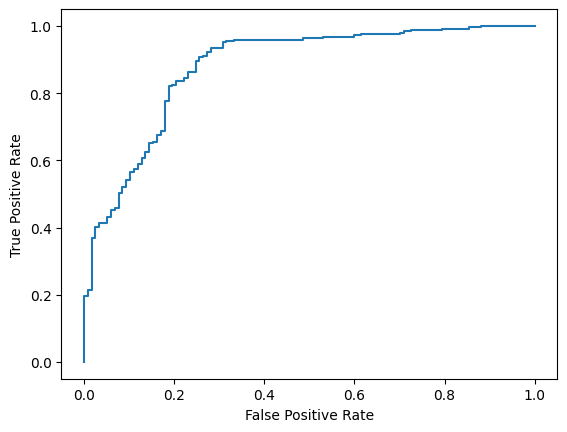

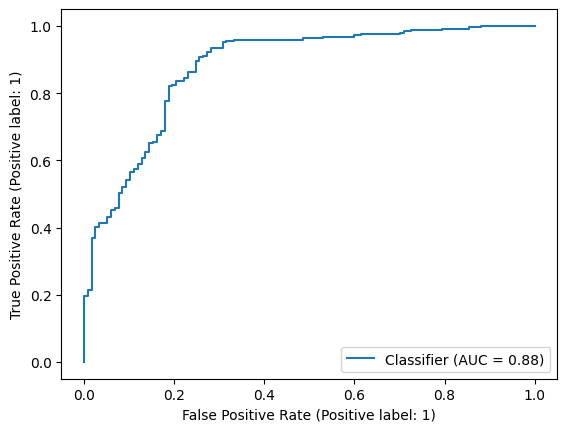

In [69]:
classes=(test_generator.labels)
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
fpr, tpr, _ = metrics.roc_curve(classes, y_pred_proba_cnn)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
RocCurveDisplay.from_predictions(classes, y_pred_proba_cnn)
#plt(plot_chance_level=True)
plt.show()


# Confusion Matrix

In [70]:
name = y_pred_proba_cnn
pred_classes = [tuple([1-x,x]) for x in name]
pred_classes=np.argmax(pred_classes,axis=1)
cm_cnn = metrics.confusion_matrix(classes, pred_classes)
print(cm_cnn)
cm_plot_labels = ['no tumor_tissue', 'tumor_tissue']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_cnn,display_labels=cm_plot_labels)
disp.plot()
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-105-3b583a95d4ff>", line 4, in <cell line: 4>
    cm_cnn = metrics.confusion_matrix(classes, pred_classes,labels([1,0]))
TypeError: 'numpy.ndarray' object is not callable

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  F

# Accuracy, Sensitivity, Specificity

In [71]:
#accuracy, sensitivity and specificity on test-dataset
TN = cm_cnn[0][0]
FN = cm_cnn[1][0]
TP = cm_cnn[1][1]
FP = cm_cnn[0][1]

specificity_cnn=TN/(TN+FP)
sensitivity_cnn=TP/(TP+FN)
accuracy_cnn=(TP+TN)/(TP+TN+FP+FN)

print("spec:", specificity_cnn)
print("sens:", sensitivity_cnn)
print("acc:", accuracy_cnn)

from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
report = classification_report(classes, pred_classes, target_names=class_labels)
print(report)
#https://stackoverflow.com/questions/64943285/getting-precision-recall-sensitivity-and-specificity-in-keras-cnn

spec: 0.7008547008547008
sens: 0.9349593495934959
acc: 0.859504132231405
              precision    recall  f1-score   support

      benign       0.84      0.70      0.76       117
   malignant       0.87      0.93      0.90       246

    accuracy                           0.86       363
   macro avg       0.85      0.82      0.83       363
weighted avg       0.86      0.86      0.86       363



# Shallow Network

In [72]:
# Create a shallow neural network model
model_snn = keras.Sequential([
    layers.Flatten(input_shape=(img_size[0], img_size[1], 3)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model_snn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.SensitivityAtSpecificity(0.5),keras.metrics.Precision(), keras.metrics.Recall()])  # Adjust loss and metrics accordingly


In [73]:
epochs = 10

In [74]:
loss,accuracy, specificity, sensitivity,precision, recall = model_snn.evaluate(test_generator)
history_snn = model_snn.fit(train_generator, epochs=epochs, validation_data=(test_generator))

12/12 [==============================] - 7s 528ms/step - loss: 0.6928 - accuracy: 0.5427 - specificity_at_sensitivity_2: 0.3162 - sensitivity_at_specificity_2: 0.2480 - precision_2: 0.6342 - recall_2: 0.7683
Epoch 1/10
46/46 [==============================] - 40s 833ms/step - loss: 2.8922 - accuracy: 0.6472 - specificity_at_sensitivity_2: 0.6582 - sensitivity_at_specificity_2: 0.6947 - precision_2: 0.7360 - recall_2: 0.7465 - val_loss: 0.7232 - val_accuracy: 0.7438 - val_specificity_at_sensitivity_2: 0.8718 - val_sensitivity_at_specificity_2: 0.9553 - val_precision_2: 0.8844 - val_recall_2: 0.7154
Epoch 2/10
46/46 [==============================] - 38s 826ms/step - loss: 0.9789 - accuracy: 0.7111 - specificity_at_sensitivity_2: 0.7622 - sensitivity_at_specificity_2: 0.8276 - precision_2: 0.7778 - recall_2: 0.8022 - val_loss: 2.8706 - val_accuracy: 0.6777 - val_specificity_at_sensitivity_2: 0.0000e+00 - val_sensitivity_at_specificity_2: 0.0000e+00 - val_precision_2: 0.6777 - val_recall_

In [79]:
print("Test accuracy:", accuracy)
print(history_snn.history)
print(accuracy)

{'loss': [3.0749285221099854, 1.0413284301757812, 1.2817105054855347, 0.9611943960189819, 0.8056200742721558, 1.0308464765548706, 1.1831265687942505, 0.8114282488822937, 1.1336510181427002, 1.3613708019256592], 'accuracy': [0.6087851524353027, 0.7165408134460449, 0.6877144575119019, 0.7206588983535767, 0.7364447712898254, 0.673987627029419, 0.6973232626914978, 0.7446808218955994, 0.7131091356277466, 0.6533973813056946], 'specificity_at_sensitivity_4': [0.5605095624923706, 0.8280254602432251, 0.774946928024292, 0.8768577575683594, 0.8535031676292419, 0.7643312215805054, 0.8365180492401123, 0.8259023427963257, 0.7558386325836182, 0.7919320464134216], 'sensitivity_at_specificity_4': [0.5831642746925354, 0.8336713910102844, 0.7799188494682312, 0.8245435953140259, 0.8590263724327087, 0.7332656979560852, 0.8083164095878601, 0.866125762462616, 0.8164300322532654, 0.7079107761383057], 'precision_4': [0.7092555165290833, 0.7920489311218262, 0.7662988901138306, 0.7846607565879822, 0.795677781105

# Accuracy and Loss in model-history








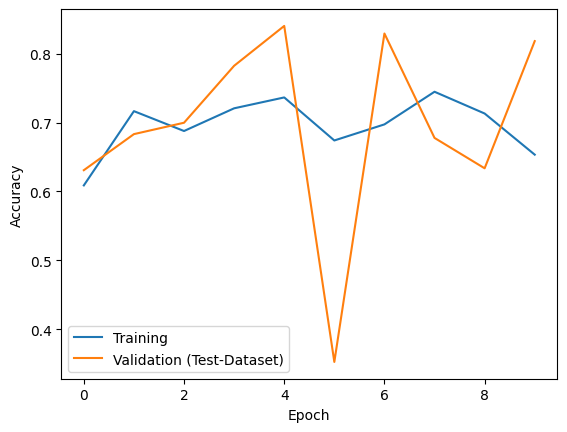

In [88]:
plt.plot(history_snn.history['accuracy'])
plt.plot(history_snn.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation (Test-Dataset)'])
plt.show()

In [84]:
plt.plot(history_snn.history['loss'])
plt.plot(history_snn.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation (Test-Dataset)'])
plt.show()

In [91]:
y_pred_proba_snn = model_snn.predict(test_generator)

12/12 [==============================] - 8s 633ms/step


# Roc-Curve

In [92]:
classes=(test_generator.labels)
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(classes, y_pred_proba_snn)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Confusion Matrix

[[ 60  57]
 [  9 237]]


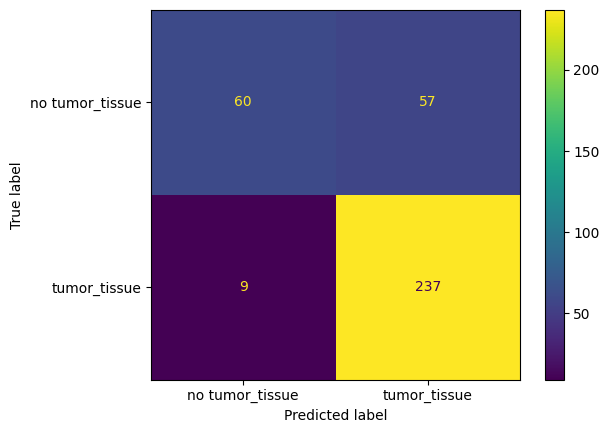

In [93]:
name = y_pred_proba_snn
pred_classes = [tuple([1-x,x]) for x in name]
pred_classes=np.argmax(pred_classes,axis=1)
cm_snn = metrics.confusion_matrix(classes, pred_classes)
print(cm_snn)
cm_plot_labels = ['no tumor_tissue', 'tumor_tissue']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_snn,display_labels=cm_plot_labels)
disp.plot()
plt.show()

# Accuracy, Sensitivity, Specificity



In [94]:
#accuracy, sensitivity and specificity on test-dataset
TN = cm_snn[0][0]
FN = cm_snn[1][0]
TP = cm_snn[1][1]
FP = cm_snn[0][1]

specificity_snn=TN/(TN+FP)
sensitivity_snn=TP/(TP+FN)
accuracy_snn=(TP+TN)/(TP+TN+FP+FN)

print("spec:", specificity_snn)
print("sens:", sensitivity_snn)
print("acc:", accuracy_snn)

from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
report = classification_report(classes, pred_classes, target_names=class_labels)
#https://stackoverflow.com/questions/64943285/getting-precision-recall-sensitivity-and-specificity-in-keras-cnn

spec: 0.5128205128205128
sens: 0.9634146341463414
acc: 0.8181818181818182


## Fully Connected

In [95]:
model = keras.Sequential([
    layers.Flatten(input_shape=(img_size[0], img_size[1], 3)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy',keras.metrics.SpecificityAtSensitivity(0.5), keras.metrics.SensitivityAtSpecificity(0.5),keras.metrics.Precision(), keras.metrics.Recall()])  # Adjust loss and metrics accordingly


In [96]:
epochs = 10
model.fit(train_generator, epochs=epochs, validation_data=test_generator)

Epoch 1/10
46/46 [==============================] - 44s 930ms/step - loss: 7.2132 - accuracy: 0.6493 - specificity_at_sensitivity_5: 0.6582 - sensitivity_at_specificity_5: 0.6795 - precision_5: 0.7313 - recall_5: 0.7617 - val_loss: 0.4785 - val_accuracy: 0.8264 - val_specificity_at_sensitivity_5: 0.8718 - val_sensitivity_at_specificity_5: 0.9593 - val_precision_5: 0.8588 - val_recall_5: 0.8902
Epoch 2/10
46/46 [==============================] - 54s 1s/step - loss: 0.6855 - accuracy: 0.7076 - specificity_at_sensitivity_5: 0.7983 - sensitivity_at_specificity_5: 0.8073 - precision_5: 0.7697 - recall_5: 0.8103 - val_loss: 0.6206 - val_accuracy: 0.6887 - val_specificity_at_sensitivity_5: 0.8718 - val_sensitivity_at_specificity_5: 0.9593 - val_precision_5: 0.6852 - val_recall_5: 1.0000
Epoch 3/10
46/46 [==============================] - 41s 897ms/step - loss: 0.5364 - accuracy: 0.8037 - specificity_at_sensitivity_5: 0.8408 - sensitivity_at_specificity_5: 0.9310 - precision_5: 0.8302 - recall

In [98]:
loss,accuracy, specificity, sensitivity,precision, recall = model.evaluate(test_generator)
print("Test accuracy:", accuracy)
history_snn = model.fit(train_generator, epochs=epochs, validation_data=(test_generator))

12/12 [==============================] - 5s 429ms/step - loss: 0.5346 - accuracy: 0.7438 - specificity_at_sensitivity_5: 0.8889 - sensitivity_at_specificity_5: 0.9634 - precision_5: 0.9048 - recall_5: 0.6951
Test accuracy: 0.7438016533851624
Epoch 1/10
46/46 [==============================] - 45s 949ms/step - loss: 0.5899 - accuracy: 0.7323 - specificity_at_sensitivity_5: 0.8429 - sensitivity_at_specificity_5: 0.8418 - precision_5: 0.7865 - recall_5: 0.8296 - val_loss: 0.8116 - val_accuracy: 0.6777 - val_specificity_at_sensitivity_5: 0.8889 - val_sensitivity_at_specificity_5: 0.9634 - val_precision_5: 0.6777 - val_recall_5: 1.0000
Epoch 2/10
46/46 [==============================] - 42s 902ms/step - loss: 0.6949 - accuracy: 0.7165 - specificity_at_sensitivity_5: 0.7983 - sensitivity_at_specificity_5: 0.8154 - precision_5: 0.7747 - recall_5: 0.8195 - val_loss: 0.4810 - val_accuracy: 0.8154 - val_specificity_at_sensitivity_5: 0.8974 - val_sensitivity_at_specificity_5: 0.9634 - val_precisi

# Accuracy and Loss in model-history

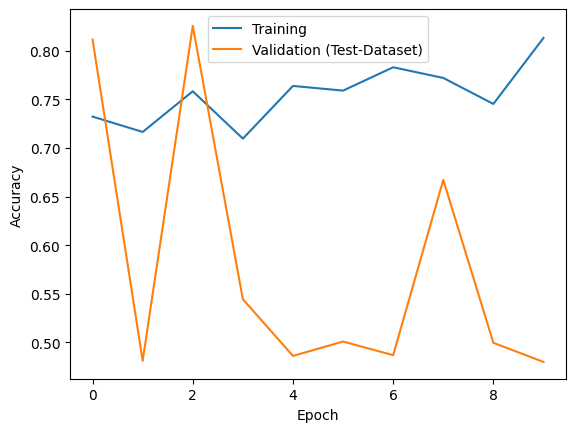

In [99]:
plt.plot(history_snn.history['accuracy'])
plt.plot(history_snn.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation (Test-Dataset)'])
plt.show()

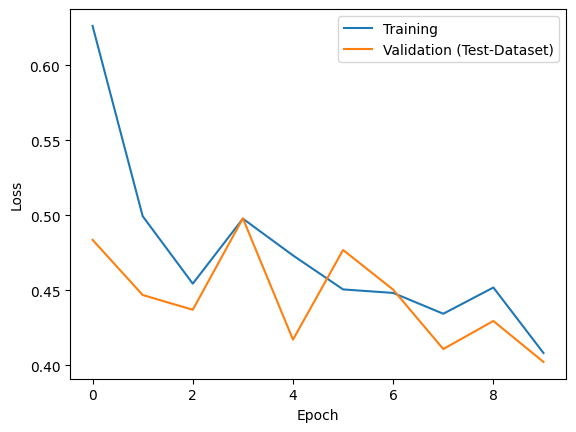

In [100]:
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation (Test-Dataset)'])
plt.show()

In [ ]:
y_pred_proba = model.predict(test_generator)

 2/12 [====>.........................] - ETA: 4s 

# ROC-Curve

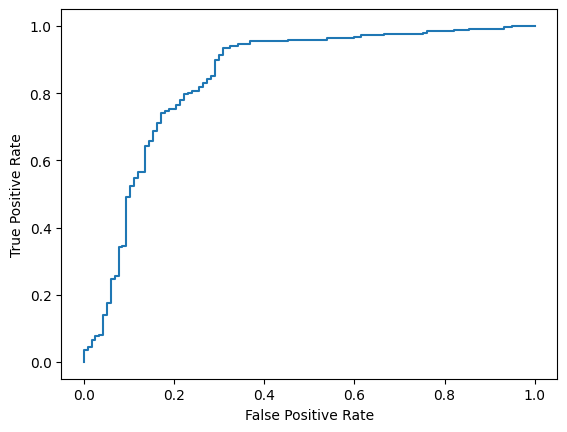

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-102-20d42e62e7db>", line 10, in <cell line: 10>
    skplt.metrics.plot_roc_curve(classes, y_pred_proba)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py", line 87, in wrapped
    return fun(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/scikitplot/metrics.py", line 257, in plot_roc_curve
    fpr[i], tpr[i], _ = roc_curve(y_true, probas[:, i],
IndexError: index 1 is out of bounds for axis 1 with size 1

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'IndexError' object has no attribute '_render_traceback_'

Dur

In [ ]:
classes=(test_generator.labels)
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(classes, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
import scikitplot as skplt
skplt.metrics.plot_roc_curve(classes, y_pred_proba)

# Confusion Matrix

In [ ]:
name = y_pred_proba

# create list of tuple using above list
# using  list comprehension and tuple()
# method
pred_classes = [tuple([1-x,x]) for x in name]
pred_classes=np.argmax(pred_classes,axis=1)
cm_snn = metrics.confusion_matrix(classes, pred_classes)
print(cm)
cm_plot_labels = ['no tumor_tissue', 'tumor_tissue']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_snn,display_labels=cm_plot_labels)
disp.plot()
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-104-2e34017b7b5f>", line 1, in <cell line: 1>
    name = y_pred_proba_nn
NameError: name 'y_pred_proba_nn' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPyt

# Accuracy, Sensitivity, Specificity


In [ ]:
#accuracy, sensitivity and specificity on test-dataset
TN = cm_snn[0][0]
FN = cm_snn[1][0]
TP = cm_snn[1][1]
FP = cm_snn[0][1]

specificity_snn=TN7TN+FP
sensitivity_snn=TP/TP+FN
accuracy_snn=TP+TN/TP+TN+FP+FN

from sklearn.metrics import classification_report

class_labels = list(test_generator.class_indices.keys())
report = classification_report(classes, pred_classes, target_names=class_labels)
#https://stackoverflow.com/questions/64943285/getting-precision-recall-sensitivity-and-specificity-in-keras-cnn

In [ ]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(history_cnn.history['val_loss'])
axs[0, 0].set_title('CNN')
axs[0, 1].plot(x, y, 'tab:orange')
axs[0, 1].set_title('SNN')
axs[1, 0].plot(x, -y, 'tab:green')
axs[1, 0].set_title('NN')
#plt.legend(['Training', 'Validation (Test-Dataset)'])

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')
   # plt.legend(['Training', 'Validation (Test-Dataset)'])


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

In [97]:
cm_plot_labels = ['no tumor_tissue', 'tumor_tissue']

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

cf_matrix = confusion_matrix(y_test, y_pred_cnn)
disp = ConfusionMatrixDisplay(cf_matrix,display_labels=cm_plot_labels)
disp.plot(ax=axes[0], xticks_rotation=45)
disp.ax_.set_title("CNN")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')

cf_matrix = confusion_matrix(y_test, y_pred_snn)
disp = ConfusionMatrixDisplay(cf_matrix,display_labels=cm_plot_labels)
disp.plot(ax=axes[1], xticks_rotation=45)
disp.ax_.set_title("SNN")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')

cf_matrix = confusion_matrix(y_test, y_pred_nnn)
disp = ConfusionMatrixDisplay(cf_matrix,display_labels=cm_plot_labels)
disp.plot(ax=axes[2], xticks_rotation=45)
disp.ax_.set_title("NN")
disp.im_.colorbar.remove()
disp.ax_.set_xlabel('')
disp.ax_.set_ylabel('')


f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()


IndentationError: ignored

In [ ]:
classes=(test_generator.labels)
from sklearn import metrics

fig, axs = plt.subplots(2, 2)
f, (ax1, ax2) = plt.subplots(2, 2,
                             sharey=True)
fpr, tpr, _ = metrics.roc_curve(classes, y_pred_proba_cnn)
ax1.plot(fpr,tpr)
ax1.set_title('CNN')

fpr, tpr, _ = metrics.roc_curve(classes, y_pred_proba_snn)
ax2.plot(fpr,tpr)
ax1.set_title('SNN')

fpr, tpr, _ = metrics.roc_curve(classes, y_pred_proba_nnn)
ax2.plot(fpr,tpr)
ax1.set_title('NN')

plt.show()

ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.plot(x, derivative)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
name = y_pred_proba_snn
pred_classes = [tuple([1-x,x]) for x in name]
pred_classes=np.argmax(pred_classes,axis=1)
cm_snn = metrics.confusion_matrix(classes, pred_classes)
print(cm_snn)
cm_plot_labels = ['no tumor_tissue', 'tumor_tissue']
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_snn,display_labels=cm_plot_labels)
disp.plot()
plt.show()

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
import os
print(os.getcwd())
from google.colab import drive
drive.mount('/content/drive/')
os.chdir("/content/drive/My Drive/Colab Notebooks")
!jupyter nbconvert --to pdf 'Kopie von Exercise2.ipynb'

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-plain-generic is already the newest version (2021.20220204-1).
texlive-xetex is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 9 not upgraded.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-70-70ca9f34ad29>", line 2, in <cell line: 2>
    print(os.getcwd())
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist-packages/IPy